In [3]:
!pip install pandas
!pip install pytrends
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing instal

In [11]:
import pandas as pd
from pytrends.request import TrendReq
import yfinance as yf
import matplotlib.pyplot as plt


In [18]:
# ビットコインの価格の情報とビットコインのトレンドの情報を取得
bitcoin = yf.download('BTC-USD', start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


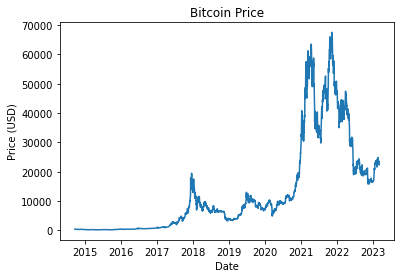

In [ ]:
# ビットコインの価格の情報を取得

plt.plot(bitcoin['Close'])
plt.title('Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


In [20]:
# グーグルトレンドから、ビットコインの話題の情報を取得
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list=['bitcoin'])
bitcoin_trend = pytrends.interest_over_time()


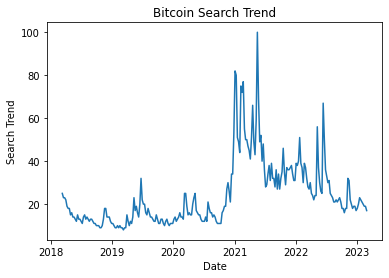

In [12]:
# ビットコインの話題の情報を取得

plt.plot(bitcoin_trend['bitcoin'])
plt.title('Bitcoin Search Trend')
plt.xlabel('Date')
plt.ylabel('Search Trend')
plt.show()


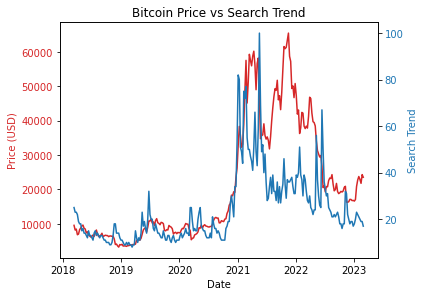

In [19]:
# ビットコインの価格の情報と話題の情報を比べる

bitcoin_combined = pd.concat([bitcoin['Close'], bitcoin_trend['bitcoin']], axis=1)

# 'bitcoin'カラムのNaN値の削除
bitcoin_combined.dropna(inplace=True)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color=color)
ax1.plot(bitcoin_combined['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Search Trend', color=color)
ax2.plot(bitcoin_combined['bitcoin'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Bitcoin Price vs Search Trend')
plt.show()


In [15]:
# ビットコインの価格の情報と、話題の情報の相関係数を計算
bitcoin_combined.corr()


,Close,bitcoin
Close,1.000000,0.751066
bitcoin,0.751066,1.000000


In [ ]:
# グーグルコラボを使い、グーグルドライブに出力するのであれば
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

bitcoin_combined.to_excel('/content/drive/MyDrive/bitcoin_data.xlsx')
files.download('/content/drive/MyDrive/bitcoin_data.xlsx')

Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>